In [4]:
import numpy as np                     # Numerical operations, handling arrays, matrices, math functions
import pandas as pd                    # Data manipulation and analysis (loading, cleaning, exploring datasets)
import matplotlib.pyplot as plt        


In [5]:
# Dataset Preparation
iris_df = pd.read_csv("Iris.csv")
wbc_df  = pd.read_csv("breast_cancer.csv")


In [6]:
# Separate features and target
iris_x = iris_df.drop(columns=['Species'])
iris_y = iris_df['Species']


In [7]:
# Split dataset into to splits one for train the model and with another test the model
from sklearn.model_selection import train_test_split
iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split( iris_x, iris_y, test_size=0.2, random_state=42)


In [8]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [9]:
# Initialize models
model1 = GaussianNB()
model2 = MultinomialNB()
model3 = BernoulliNB()

#train models
model1.fit(iris_x_train,iris_y_train)
model2.fit(iris_x_train,iris_y_train)
model3.fit(iris_x_train,iris_y_train)

BernoulliNB()

In [10]:
# Find prediction with test features
iris_y_predict1 = model1.predict(iris_x_test)
iris_y_predict2 = model2.predict(iris_x_test)
iris_y_predict3 = model3.predict(iris_x_test)

In [11]:
# Evaluation of classifier performance

from sklearn.metrics import classification_report,confusion_matrix
print("GaussianNB")
print("Confusion matrix :")
print(confusion_matrix(iris_y_test,iris_y_predict1))
print("Performence Evaluation : ")
print(classification_report(iris_y_test,iris_y_predict1))
print("---------------------------------------------------------------------------")
print("MultinomialNB")
print("Confusion matrix :")
print(confusion_matrix(iris_y_test,iris_y_predict2))
print("Performence Evaluation : ")
print(classification_report(iris_y_test,iris_y_predict2))
print("---------------------------------------------------------------------------")
print("BernoulliNB")
print("Confusion matrix :")
print(confusion_matrix(iris_y_test,iris_y_predict3))
print("Performence Evaluation : ")
print(classification_report(iris_y_test,iris_y_predict3))

GaussianNB
Confusion matrix :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Performence Evaluation : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

---------------------------------------------------------------------------
MultinomialNB
Confusion matrix :
[[ 9  1  0]
 [ 0  9  0]
 [ 0  1 10]]
Performence Evaluation : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.90      0.95        10
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.93

D:\Apps_Download\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Apps_Download\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Apps_Download\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
model3 = BernoulliNB(alpha=0.5, binarize=2)
model3.fit(iris_x_train,iris_y_train)
iris_y_predict3 = model3.predict(iris_x_test)
print("BernoulliNB")
print("Confusion matrix :")
print(confusion_matrix(iris_y_test,iris_y_predict3))
print("Performence Evaluation : ")
print(classification_report(iris_y_test,iris_y_predict3))

BernoulliNB
Confusion matrix :
[[29  0  0]
 [ 0 23  0]
 [ 0 13 10]]
Performence Evaluation : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       0.64      1.00      0.78        23
 Iris-virginica       1.00      0.43      0.61        23

       accuracy                           0.83        75
      macro avg       0.88      0.81      0.80        75
   weighted avg       0.89      0.83      0.81        75



[0 1 2 3]
[1.0, 1.0, 1.0, 1.0]
[0.9333333333333333, 0.9555555555555556, 0.9, 0.84]
[0.8666666666666667, 0.8666666666666667, 0.85, 0.8266666666666667]


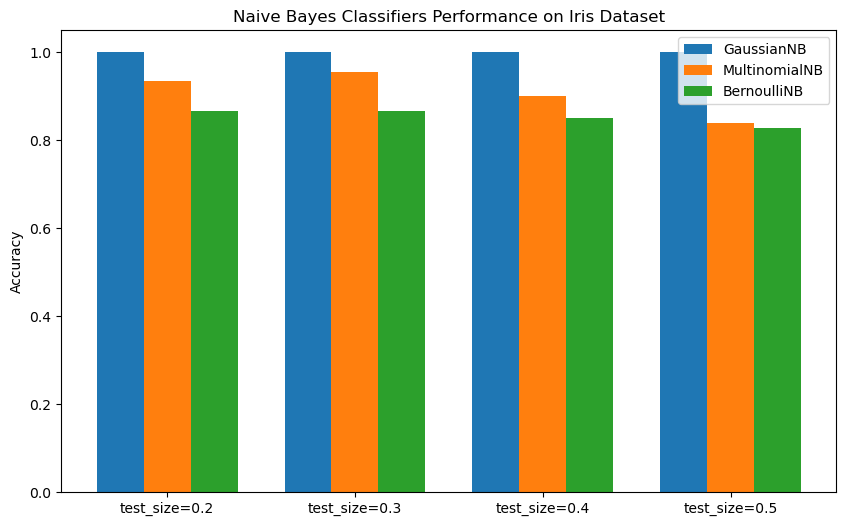

In [26]:
from sklearn.metrics import accuracy_score

splits = [0.2, 0.3, 0.4, 0.5]
results = {"GaussianNB": [], "MultinomialNB": [], "BernoulliNB": []}

for split in splits:
    # Split the data
    iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split( iris_x, iris_y, test_size = split, random_state=42)

    
    model1.fit(iris_x_train, iris_y_train)
    results["GaussianNB"].append(accuracy_score(iris_y_test, model1.predict(iris_x_test)))

    model2.fit(iris_x_train, iris_y_train)
    results["MultinomialNB"].append(accuracy_score(iris_y_test, model2.predict(iris_x_test)))


    model3.fit(iris_x_train, iris_y_train) 
    results["BernoulliNB"].append(accuracy_score(iris_y_test, model3.predict(iris_x_test)))

x = np.arange(len(splits))
width = 0.25


print(results["GaussianNB"])
print(results["MultinomialNB"])
print(results["BernoulliNB"])
plt.figure(figsize=(10,6))
plt.bar(x - width, results["GaussianNB"], width, label='GaussianNB')
plt.bar(x, results["MultinomialNB"], width, label='MultinomialNB')
plt.bar(x + width, results["BernoulliNB"], width, label='BernoulliNB')
plt.xticks(x, [f"test_size={s}" for s in splits])
plt.ylim(0, 1.05)
plt.ylabel("Accuracy")
plt.title("Naive Bayes Classifiers Performance on Iris Dataset")
plt.legend()
plt.show()


In [187]:
wbc_x = wbc_df.drop(columns=['diagnosis'])
wbc_y = wbc_df['diagnosis']

wbc_x_train, wbc_x_test, wbc_y_train, wbc_y_test = train_test_split(
    wbc_x, wbc_y, test_size=0.2, random_state=42
)

In [237]:
# Initialize models
model1 = GaussianNB(var_smoothing=1e-12)
model2 = MultinomialNB(alpha=0.5)
model3 = BernoulliNB(alpha=0.5, binarize=3)

#train models
model1.fit(wbc_x_train,wbc_y_train)
model2.fit(wbc_x_train,wbc_y_train)
model3.fit(wbc_x_train,wbc_y_train)

BernoulliNB(alpha=0.5, binarize=3)

In [239]:
# Find prediction with test features
wbc_y_predict1 = model1.predict(wbc_x_test)
wbc_y_predict2 = model2.predict(wbc_x_test)
wbc_y_predict3 = model3.predict(wbc_x_test)


In [241]:
print("GaussianNB")
print("Confusion matrix :")
print(confusion_matrix(wbc_y_test, wbc_y_predict1))
print("Performance Evaluation : ")
print(classification_report(wbc_y_test, wbc_y_predict1))
print("---------------------------------------------------------------------------")

print("MultinomialNB")
print("Confusion matrix :")
print(confusion_matrix(wbc_y_test, wbc_y_predict2))
print("Performance Evaluation : ")
print(classification_report(wbc_y_test, wbc_y_predict2))
print("---------------------------------------------------------------------------")

print("BernoulliNB")
print("Confusion matrix :")
print(confusion_matrix(wbc_y_test, wbc_y_predict3))
print("Performance Evaluation : ")
print(classification_report(wbc_y_test, wbc_y_predict3))

GaussianNB
Confusion matrix :
[[70  1]
 [ 7 36]]
Performance Evaluation : 
              precision    recall  f1-score   support

           B       0.91      0.99      0.95        71
           M       0.97      0.84      0.90        43

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

---------------------------------------------------------------------------
MultinomialNB
Confusion matrix :
[[ 9 62]
 [ 7 36]]
Performance Evaluation : 
              precision    recall  f1-score   support

           B       0.56      0.13      0.21        71
           M       0.37      0.84      0.51        43

    accuracy                           0.39       114
   macro avg       0.46      0.48      0.36       114
weighted avg       0.49      0.39      0.32       114

---------------------------------------------------------------------------
BernoulliNB
Confusion matrix :
[[63  8]
 

GaussianNB: [0.9298245614035088, 0.9122807017543859, 0.9166666666666666, 0.9052631578947369]
MultinomialNB: [0.39473684210526316, 0.4093567251461988, 0.39473684210526316, 0.37543859649122807]
BernoulliNB: [0.8333333333333334, 0.8128654970760234, 0.8333333333333334, 0.8175438596491228]


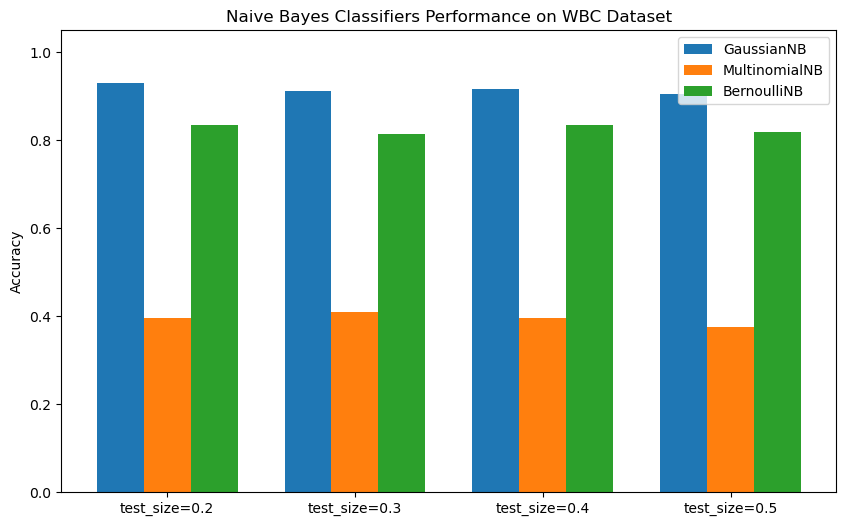

In [245]:
splits = [0.2, 0.3, 0.4, 0.5]
results = {"GaussianNB": [], "MultinomialNB": [], "BernoulliNB": []}

for split in splits:
    wbc_x_train, wbc_x_test, wbc_y_train, wbc_y_test = train_test_split(
        wbc_x, wbc_y, test_size=split, random_state=42
    )

    # GaussianNB
    model1.fit(wbc_x_train, wbc_y_train)
    results["GaussianNB"].append(accuracy_score(wbc_y_test, model1.predict(wbc_x_test)))

    # MultinomialNB
    model2.fit(wbc_x_train, wbc_y_train)
    results["MultinomialNB"].append(accuracy_score(wbc_y_test, model2.predict(wbc_x_test)))

    # BernoulliNB
    model3.fit(wbc_x_train, wbc_y_train)
    results["BernoulliNB"].append(accuracy_score(wbc_y_test, model3.predict(wbc_x_test)))

# Print accuracies
print("GaussianNB:", results["GaussianNB"])
print("MultinomialNB:", results["MultinomialNB"])
print("BernoulliNB:", results["BernoulliNB"])

# Plotting
x = np.arange(len(splits))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, results["GaussianNB"], width, label='GaussianNB')
plt.bar(x, results["MultinomialNB"], width, label='MultinomialNB')
plt.bar(x + width, results["BernoulliNB"], width, label='BernoulliNB')

plt.xticks(x, [f"test_size={s}" for s in splits])
plt.ylim(0, 1.05)
plt.ylabel("Accuracy")
plt.title("Naive Bayes Classifiers Performance on WBC Dataset")
plt.legend()
plt.show()

In [349]:
from sklearn.tree import DecisionTreeClassifier

iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(
    iris_x, iris_y, test_size=0.8, random_state=42
)

# Initialize the models (Gini and Entropy)
model_gini1 = DecisionTreeClassifier(criterion="gini", random_state=42)
model_entropy1 = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Train the models
model_gini1.fit(iris_x_train, iris_y_train)
model_entropy1.fit(iris_x_train, iris_y_train)

# Predictions
iris_y_predict_gini = model_gini1.predict(iris_x_test)
iris_y_predict_entropy = model_entropy1.predict(iris_x_test)

# Evaluation of classifier performance
print("Decision Tree (Gini)")
print("Confusion matrix :")
print(confusion_matrix(iris_y_test, iris_y_predict_gini))
print("Performance Evaluation :")
print(classification_report(iris_y_test, iris_y_predict_gini))
print("---------------------------------------------------------------------------")
print("Decision Tree (Entropy)")
print("Confusion matrix :")
print(confusion_matrix(iris_y_test, iris_y_predict_entropy))
print("Performance Evaluation :")
print(classification_report(iris_y_test, iris_y_predict_entropy))

Decision Tree (Gini)
Confusion matrix :
[[43  0  0]
 [ 1 38  0]
 [ 0  1 37]]
Performance Evaluation :
                 precision    recall  f1-score   support

    Iris-setosa       0.98      1.00      0.99        43
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       1.00      0.97      0.99        38

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

---------------------------------------------------------------------------
Decision Tree (Entropy)
Confusion matrix :
[[43  0  0]
 [ 1 38  0]
 [ 0  1 37]]
Performance Evaluation :
                 precision    recall  f1-score   support

    Iris-setosa       0.98      1.00      0.99        43
Iris-versicolor       0.97      0.97      0.97        39
 Iris-virginica       1.00      0.97      0.99        38

       accuracy                           0.98       120
      macro avg       0.98  

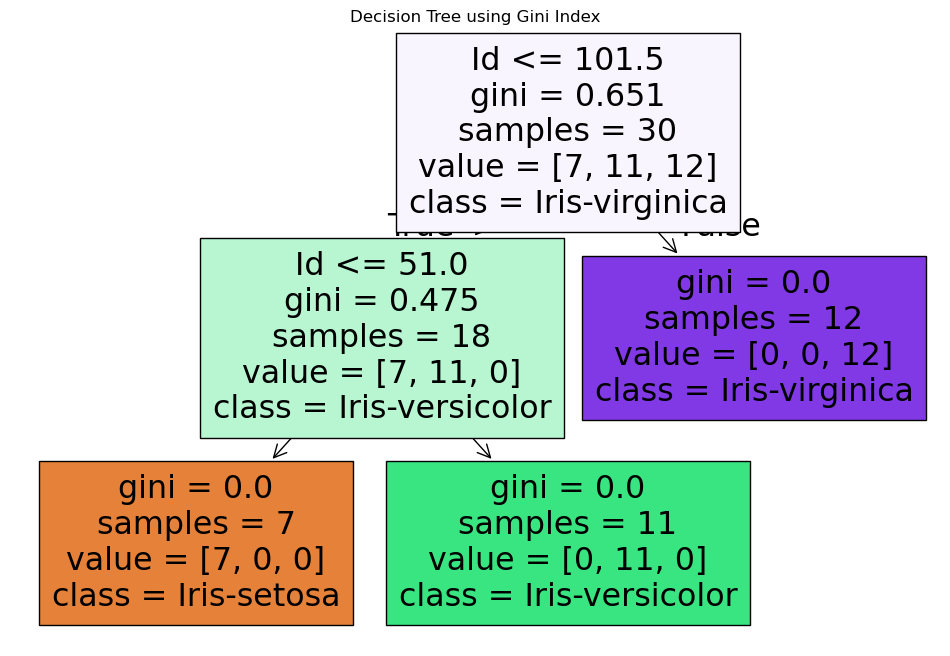

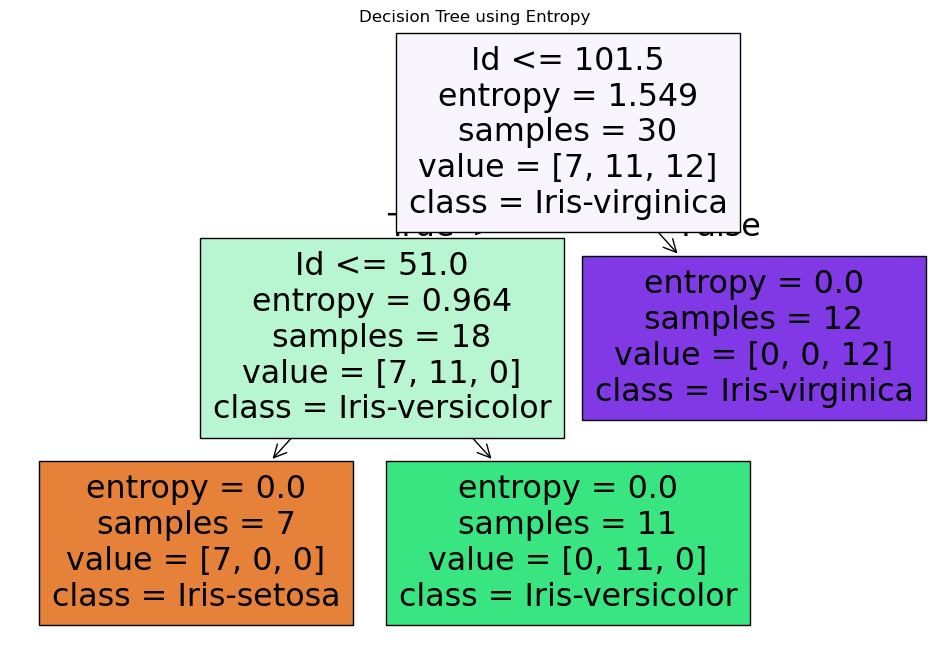

In [361]:
from sklearn.tree import plot_tree

# ------------------ Plot Gini Tree ------------------
plt.figure(figsize=(12,8))
plot_tree(
    model_gini1, 
    filled=True, 
    feature_names = iris_x.columns.tolist(), 
    class_names = iris_y.unique().astype(str)
)
plt.title("Decision Tree using Gini Index")
plt.show()

# ------------------ Plot Entropy Tree ------------------
plt.figure(figsize=(12,8))
plot_tree(
    model_entropy1, 
    filled=True, 
    feature_names = iris_x.columns.tolist(), 
    class_names = iris_y.unique().astype(str)
)
plt.title("Decision Tree using Entropy")
plt.show()

In [389]:
from sklearn import tree
text_presentation_gini_iris = tree.export_text(model_gini1)
print(text_presentation_gini_iris)

|--- feature_0 <= 101.50
|   |--- feature_0 <= 51.00
|   |   |--- class: Iris-setosa
|   |--- feature_0 >  51.00
|   |   |--- class: Iris-versicolor
|--- feature_0 >  101.50
|   |--- class: Iris-virginica



In [391]:
text_presentation_entropy_iris = tree.export_text(model_entropy1)
print(text_presentation_entropy_iris)

|--- feature_0 <= 101.50
|   |--- feature_0 <= 51.00
|   |   |--- class: Iris-setosa
|   |--- feature_0 >  51.00
|   |   |--- class: Iris-versicolor
|--- feature_0 >  101.50
|   |--- class: Iris-virginica



In [393]:
wbc_x_train, wbc_x_test, wbc_y_train, wbc_y_test = train_test_split(
    wbc_x, wbc_y, test_size=0.8, random_state=42
)

# Initialize models
model_gini2 = DecisionTreeClassifier(criterion="gini", random_state=42)
model_entropy2 = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Train the models
model_gini2.fit(wbc_x_train, wbc_y_train)
model_entropy2.fit(wbc_x_train, wbc_y_train)

# Predictions
wbc_y_predict_gini = model_gini2.predict(wbc_x_test)
wbc_y_predict_entropy = model_entropy2.predict(wbc_x_test)

# Evaluation of classifier performance
print("Decision Tree (Gini)")
print("Confusion Matrix :")
print(confusion_matrix(wbc_y_test, wbc_y_predict_gini))
print("Performance Evaluation :")
print(classification_report(wbc_y_test, wbc_y_predict_gini))
print("---------------------------------------------------------------------------")
print("Decision Tree (Entropy)")
print("Confusion Matrix :")
print(confusion_matrix(wbc_y_test, wbc_y_predict_entropy))
print("Performance Evaluation :")
print(classification_report(wbc_y_test, wbc_y_predict_entropy))

Decision Tree (Gini)
Confusion Matrix :
[[262  28]
 [ 19 147]]
Performance Evaluation :
              precision    recall  f1-score   support

           B       0.93      0.90      0.92       290
           M       0.84      0.89      0.86       166

    accuracy                           0.90       456
   macro avg       0.89      0.89      0.89       456
weighted avg       0.90      0.90      0.90       456

---------------------------------------------------------------------------
Decision Tree (Entropy)
Confusion Matrix :
[[261  29]
 [ 12 154]]
Performance Evaluation :
              precision    recall  f1-score   support

           B       0.96      0.90      0.93       290
           M       0.84      0.93      0.88       166

    accuracy                           0.91       456
   macro avg       0.90      0.91      0.90       456
weighted avg       0.91      0.91      0.91       456



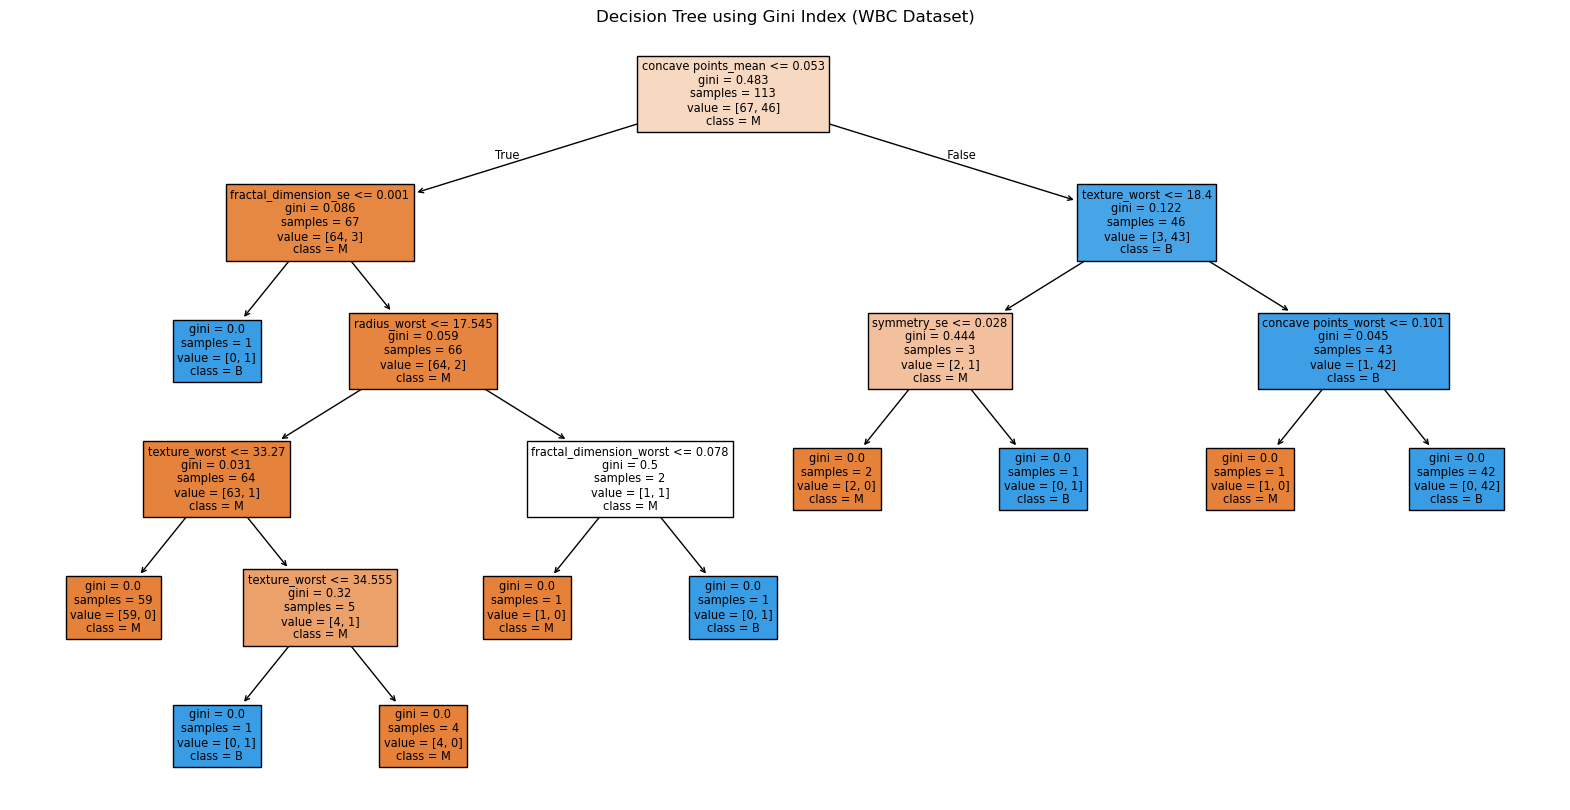

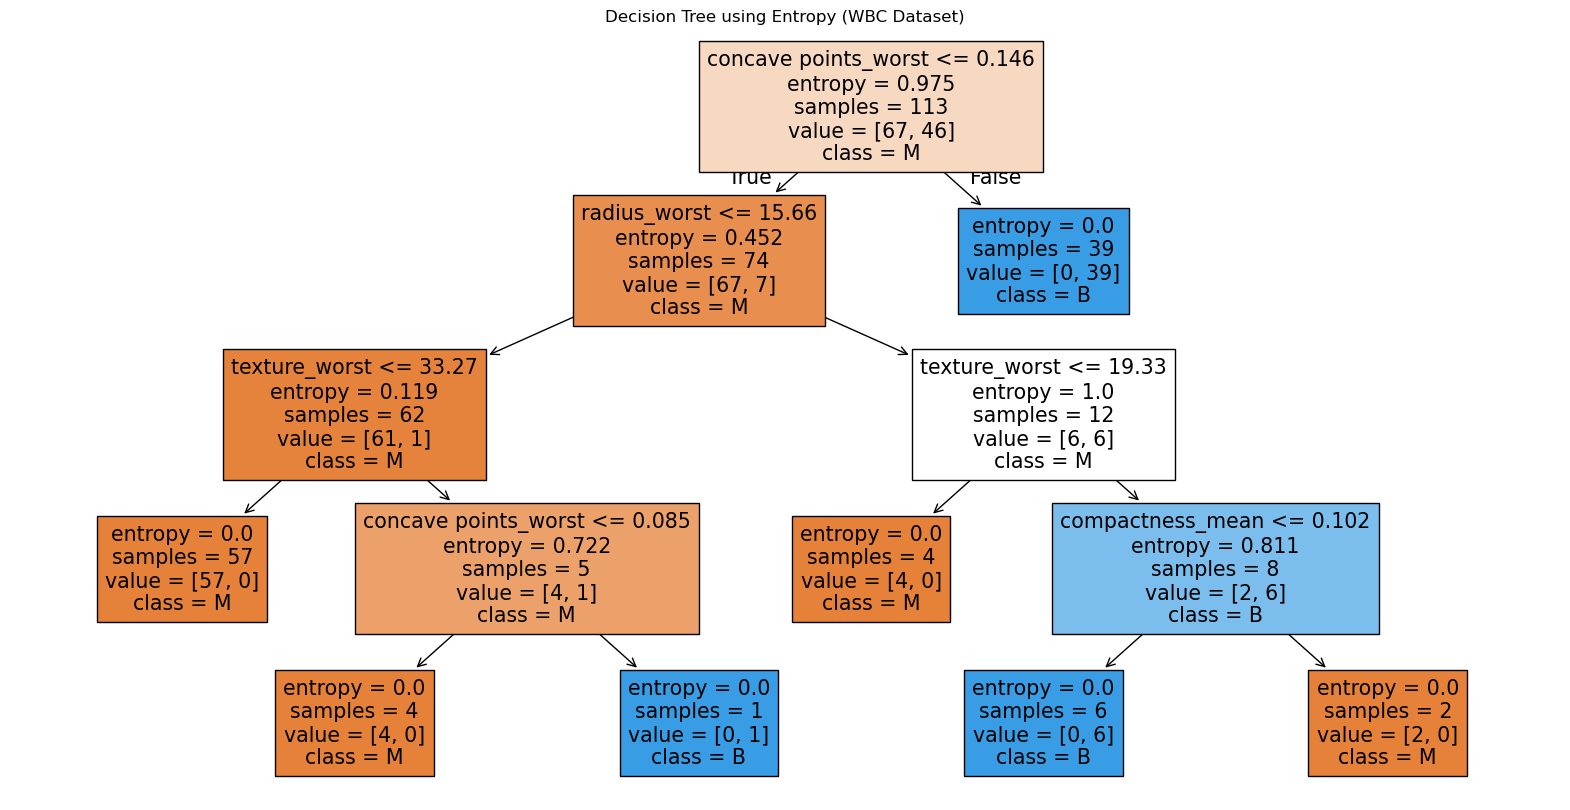

In [395]:
from sklearn.tree import plot_tree

# ------------------ Plot Gini Tree ------------------
plt.figure(figsize=(20,10))   
plot_tree(
    model_gini2, 
    filled=True, 
    feature_names = wbc_x.columns.tolist(),   
    class_names = wbc_y.unique().astype(str)  
)
plt.title("Decision Tree using Gini Index (WBC Dataset)")
plt.show()

# ------------------ Plot Entropy Tree ------------------
plt.figure(figsize=(20,10))
plot_tree(
    model_entropy2, 
    filled=True, 
    feature_names = wbc_x.columns.tolist(), 
    class_names = wbc_y.unique().astype(str)
)
plt.title("Decision Tree using Entropy (WBC Dataset)")
plt.show()


In [396]:
text_presentation_gini_breast_cancer = tree.export_text(model_gini2)
print(text_presentation_gini_breast_cancer)

|--- feature_8 <= 0.05
|   |--- feature_20 <= 0.00
|   |   |--- class: M
|   |--- feature_20 >  0.00
|   |   |--- feature_21 <= 17.55
|   |   |   |--- feature_22 <= 33.27
|   |   |   |   |--- class: B
|   |   |   |--- feature_22 >  33.27
|   |   |   |   |--- feature_22 <= 34.56
|   |   |   |   |   |--- class: M
|   |   |   |   |--- feature_22 >  34.56
|   |   |   |   |   |--- class: B
|   |   |--- feature_21 >  17.55
|   |   |   |--- feature_30 <= 0.08
|   |   |   |   |--- class: B
|   |   |   |--- feature_30 >  0.08
|   |   |   |   |--- class: M
|--- feature_8 >  0.05
|   |--- feature_22 <= 18.40
|   |   |--- feature_19 <= 0.03
|   |   |   |--- class: B
|   |   |--- feature_19 >  0.03
|   |   |   |--- class: M
|   |--- feature_22 >  18.40
|   |   |--- feature_28 <= 0.10
|   |   |   |--- class: B
|   |   |--- feature_28 >  0.10
|   |   |   |--- class: M



In [398]:
text_presentation_entropy_breast_cancer = tree.export_text(model_entropy2)
print(text_presentation_entropy_breast_cancer)

|--- feature_28 <= 0.15
|   |--- feature_21 <= 15.66
|   |   |--- feature_22 <= 33.27
|   |   |   |--- class: B
|   |   |--- feature_22 >  33.27
|   |   |   |--- feature_28 <= 0.09
|   |   |   |   |--- class: B
|   |   |   |--- feature_28 >  0.09
|   |   |   |   |--- class: M
|   |--- feature_21 >  15.66
|   |   |--- feature_22 <= 19.33
|   |   |   |--- class: B
|   |   |--- feature_22 >  19.33
|   |   |   |--- feature_6 <= 0.10
|   |   |   |   |--- class: M
|   |   |   |--- feature_6 >  0.10
|   |   |   |   |--- class: B
|--- feature_28 >  0.15
|   |--- class: M

